In [1]:
from wNMF import wNMF
import numpy as np

In [2]:
import pickle
import numpy as np
f = open('data/cpg/cpg_single_50Knot_test.pkl','rb')
cpg = pickle.load(f)
print(cpg)

X = np.abs(cpg.left_cpg.cpg.W)
X.shape
n=X.shape[0]
features = X.shape[1]
W = np.ones_like(X)

In [3]:
K = 5
N,M = W.shape

components=4


## Define the model / fit
model = wNMF(n_components=components,
            beta_loss='kullback-leibler',
            max_iter=1000,
            track_error=True)

fit = model.fit(X=X,W=W,n_run=5)

Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 2...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 3...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 4...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 5...
|--- Initializing U,V
|--- Running wNMF
|--- Completed


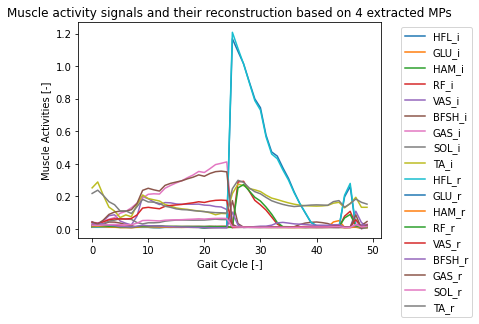

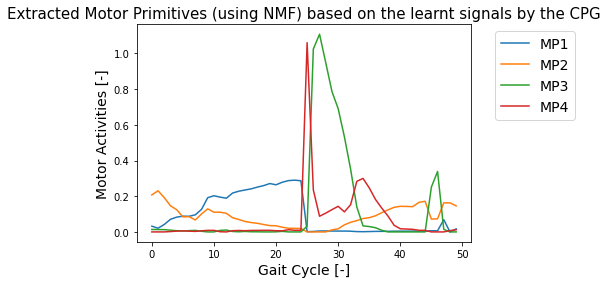

(50, 11)

In [4]:
import matplotlib.pyplot as plt 
## Get the best solutions
lowest_error = fit.err
best_V = fit.V
best_U = fit.U

## Or look at all the solutions from the 5 runs in this example
all_Vs = fit.V_all
lowest_error

Xr = np.matmul(best_U,best_V)

error = abs(X-Xr)

# Plot of the initial and reconstructed muscle activity signals
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.7, 0.75])
p1, = ax.plot(X[:,2], label='HFL_i')
p2, = ax.plot(X[:,3], label='GLU_i')
p3, = ax.plot(X[:,4], label='HAM_i')
p4, = ax.plot(X[:,5], label='RF_i')
p5, = ax.plot(X[:,6], label='VAS_i')
p6, = ax.plot(X[:,7], label='BFSH_i')
p7, = ax.plot(X[:,8], label='GAS_i')
p8, = ax.plot(X[:,9], label='SOL_i')
p9, = ax.plot(X[:,10], label='TA_i')
p10, = ax.plot(Xr[:,2], label='HFL_r')
p11, = ax.plot(Xr[:,3], label='GLU_r')
p12, = ax.plot(Xr[:,4], label='HAM_r')
p13, = ax.plot(Xr[:,5], label='RF_r')
p14, = ax.plot(Xr[:,6], label='VAS_r')
p15, = ax.plot(Xr[:,7], label='BFSH_r')
p16, = ax.plot(Xr[:,8], label='GAS_r')
p17, = ax.plot(Xr[:,9], label='SOL_r')
p18, = ax.plot(Xr[:,10], label='TA_r')
plt.title('Muscle activity signals and their reconstruction based on 4 extracted MPs')
plt.xlabel('Gait Cycle [-]')
plt.ylabel('Muscle Activities [-]')
ax.legend(handles=[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18,], bbox_to_anchor = (1.05, 1), loc='upper left')
plt.show()

# Plot of the motor primitives extracted
plt.plot(best_U[:,0], label='MP1')
plt.plot(best_U[:,1], label='MP2')
plt.plot(best_U[:,2], label='MP3')
plt.plot(best_U[:,3], label='MP4')
plt.title('Extracted Motor Primitives (using NMF) based on the learnt signals by the CPG', fontsize=15)
plt.xlabel('Gait Cycle [-]', fontsize=14)
plt.ylabel('Motor Activities [-]', fontsize=14)
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, prop={'size':14})
plt.show()

#plt.plot(X[:,:],'--')
#plt.fill_between(Xr[:,_id]-error[:,_id], Xr[:,_id]+error[:,_id])
Xr.shape

In [ ]:
cpg.left_cpg.cpg.W = Xr
cpg.right_cpg.cpg.W = Xr
f = open('data/cpg/cpg_2D_spinal_single_50Knot.pkl','wb')
pickle.dump(cpg,f)